# Basic Principles of Machine Learning

### at PyData Chicago 2015
upgraded and enhanced [Jake Vanderplas](https://www.youtube.com/watch?v=L7R4HUQ-eQ0) and added more Estimators

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

# Quick Application: Optical Character Recognition

To demonstrate the above principles on a more interesting problem, let's consider OCR (Optical Character Recognition) – that is, recognizing hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use scikit-learn's set of pre-formatted digits, which is built-in to the library.

### Loading and visualizing the digits data

We'll use scikit-learn's data access interface and take a look at this data:

In [9]:
from sklearn import datasets

digits = datasets.load_digits()

digits.images.shape, digits.data.shape

((1797, 8, 8), (1797, 64))

Let's plot a few of these:

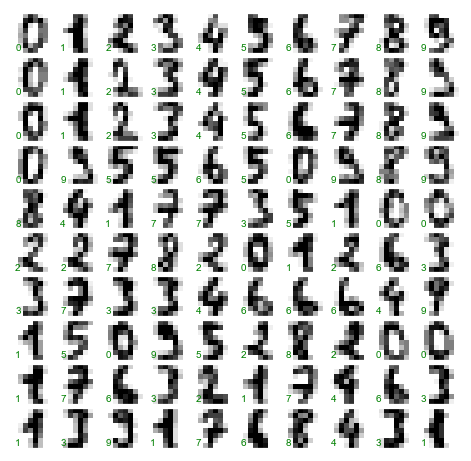

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Here the data is simply each pixel value within an 8x8 grid:

In [11]:
# The images themselves
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
# The data for use in our algorithms
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
# The target label
print(digits.target)

[0 1 2 ... 8 9 8]


So our data have 1797 samples in 64 dimensions.

### Unsupervised Learning: Dimensionality Reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions!
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a **manifold learning algorithm** called *Isomap*, and transform the data to two dimensions.

In [15]:
from sklearn.manifold import Isomap

In [16]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)

In [17]:
data_projected.shape, data_projected[0]

((1797, 2), array([-167.27247954,  -22.18515653]))

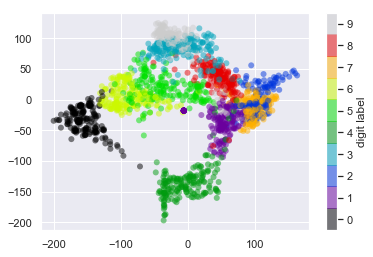

In [19]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));


plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

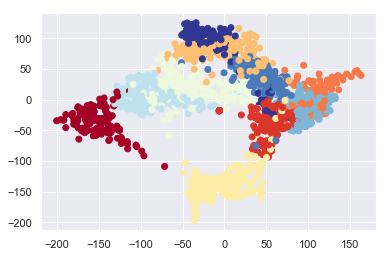

In [18]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, cmap='RdYlBu')


We see here that the digits are fairly well-separated in the parameter space; **this tells us** that **a supervised classification algorithm** should perform fairly well. Let's give it a try.

# Classification on Digits - Logistic Regression

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample:

In [21]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2)

Xtrain.shape, Xtest.shape

(1347, 64) (450, 64)


Let's use a simple **logistic regression** which (despite its confusing name) is a classification algorithm:

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=20000, multi_class='auto')

clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

In [27]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ypred)

0.9533333333333334

This single number doesn't tell us **where** we've gone wrong: one nice way to do this is to use the *confusion matrix*

In [30]:
from sklearn.metrics import confusion_matrix

x = confusion_matrix(ytest, ypred)

x

array([[41,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 49,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 36]])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


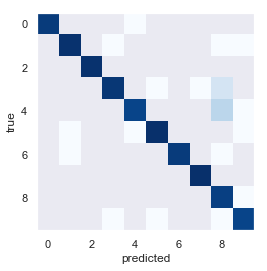

In [31]:
plt.imshow(np.log(x), cmap='Blues', interpolation='nearest')

plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

We might also take a look at some of the outputs along with their predicted labels. We'll make the bad labels red:

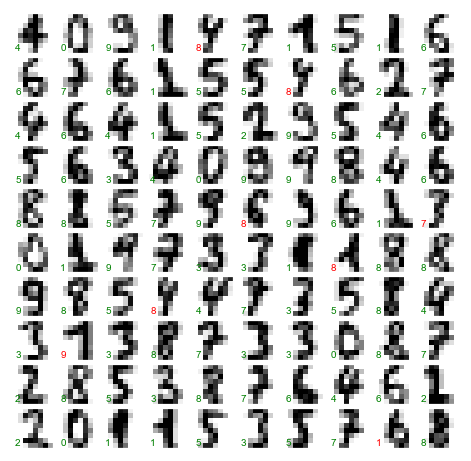

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!

There are many ways to improve this classifier, but we're out of time here. To go further, we could use a more sophisticated model, use cross validation, or apply other techniques.
We'll cover some of these topics later in the tutorial.

# Classification on Digits - Random Forest

w/ RandomForestClassifier


In [109]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2)

Xtrain.shape, Xtest.shape

((1347, 64), (450, 64))

In [110]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_features='log2')

clf.fit(Xtrain, ytrain)

clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
clf.feature_importances_

array([0.00000000e+00, 2.39221300e-03, 2.15595081e-02, 1.15991323e-02,
       1.04254978e-02, 1.93496040e-02, 8.68344556e-03, 7.66154526e-04,
       6.45377494e-05, 1.13593542e-02, 2.51465445e-02, 8.24131421e-03,
       1.68050311e-02, 2.94584842e-02, 6.42458768e-03, 6.78989336e-04,
       9.07962497e-05, 8.94889730e-03, 2.05051866e-02, 2.40477944e-02,
       2.98590994e-02, 4.44299685e-02, 1.07412673e-02, 3.45277134e-04,
       5.87272877e-05, 1.46545670e-02, 3.91463615e-02, 2.55476350e-02,
       3.31378870e-02, 2.61064817e-02, 2.91018081e-02, 2.83514233e-05,
       0.00000000e+00, 3.21360336e-02, 2.78518170e-02, 1.94636190e-02,
       3.81151003e-02, 1.99428811e-02, 2.51402745e-02, 0.00000000e+00,
       6.03481215e-05, 1.20399701e-02, 3.48195547e-02, 3.94850727e-02,
       2.16529395e-02, 1.80913445e-02, 2.01793806e-02, 7.18923347e-05,
       1.34947622e-05, 2.86022003e-03, 1.83853942e-02, 2.14689624e-02,
       1.46189695e-02, 2.16126506e-02, 2.51488162e-02, 1.85362845e-03,
      

In [112]:
clf.decision_path(Xtrain)

(<1347x366548 sparse matrix of type '<class 'numpy.int64'>'
 	with 12369585 stored elements in Compressed Sparse Row format>,
 array([     0,    365,    744, ..., 365786, 366135, 366548]))

In [113]:
ypred = clf.predict(Xtest)

In [114]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ypred), clf.score(Xtest, ytest)

(0.9644444444444444, 0.9644444444444444)

In [115]:
from sklearn.metrics import confusion_matrix

x = confusion_matrix(ytest, ypred)

x

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


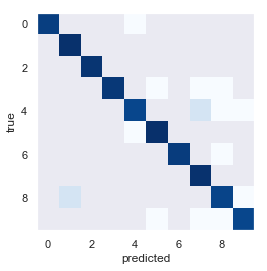

In [116]:
plt.imshow(np.log(x), cmap='Blues', interpolation='nearest')

plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

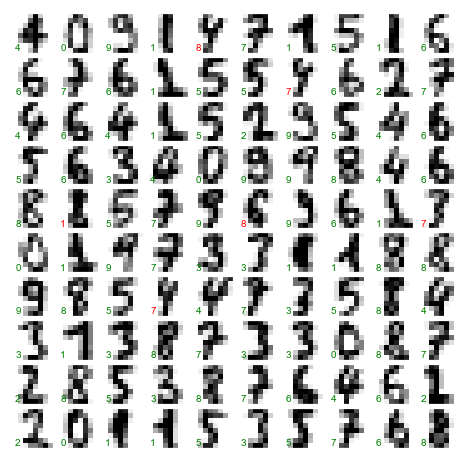

In [117]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

# Classification on Digits - SVM

w/ svc


In [119]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2)

Xtrain.shape, Xtest.shape

((1347, 64), (450, 64))

In [123]:
from sklearn.svm import SVC

clf = SVC(gamma='scale')

clf.fit(Xtrain, ytrain)

clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
ypred = clf.predict(Xtest)

In [127]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ypred), clf.score(Xtest, ytest)

(0.98, 0.98)

In [129]:
from sklearn.metrics import confusion_matrix

x = confusion_matrix(ytest, ypred)

x

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 37]])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


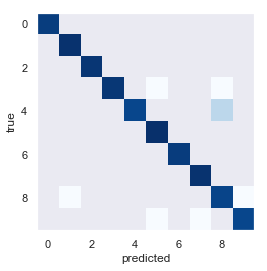

In [130]:
plt.imshow(np.log(x), cmap='Blues', interpolation='nearest')

plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

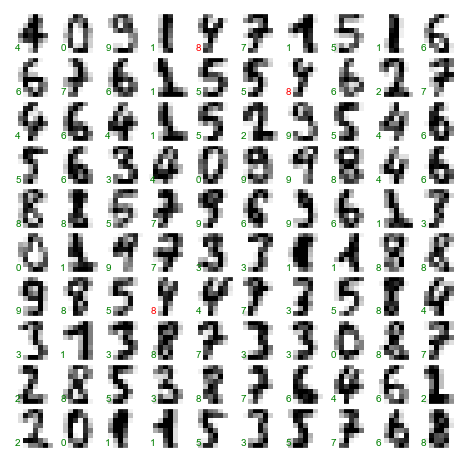

In [131]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])